In [377]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [378]:
df = pd.read_csv(r'C:\Users\Mayur\Downloads\Main_Divvy_File.csv')

In [379]:
df.head()

,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,trip_id
0,3/31/2017 23:59:07,4/1/2017 00:13:24,5292.0,857.0,66.0,Clinton St & Lake St,171.0,May St & Cullerton St,Subscriber,Male,1989.0,13518905.0
1,3/31/2017 23:56:25,4/1/2017 00:00:21,4408.0,236.0,199.0,Wabash Ave & Grand Ave,26.0,McClurg Ct & Illinois St,Subscriber,Male,1990.0,13518904.0
2,3/31/2017 23:55:33,4/1/2017 00:01:21,696.0,348.0,520.0,Greenview Ave & Jarvis Ave,432.0,Clark St & Lunt Ave,Subscriber,Female,1979.0,13518903.0
3,3/31/2017 23:54:46,3/31/2017 23:59:34,4915.0,288.0,110.0,Dearborn St & Erie St,142.0,McClurg Ct & Erie St,Subscriber,Male,1985.0,13518902.0
4,3/31/2017 23:53:33,4/1/2017 00:00:28,4247.0,415.0,327.0,Sheffield Ave & Webster Ave,331.0,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0,13518901.0


In [380]:
sum(df.isnull().values.ravel())

633550

In [381]:
df=df.dropna()

In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234638 entries, 0 to 1551504
Data columns (total 12 columns):
start_time           1234638 non-null object
end_time             1234638 non-null object
bikeid               1234638 non-null float64
tripduration         1234638 non-null float64
from_station_id      1234638 non-null float64
from_station_name    1234638 non-null object
to_station_id        1234638 non-null float64
to_station_name      1234638 non-null object
usertype             1234638 non-null object
gender               1234638 non-null object
birthyear            1234638 non-null float64
trip_id              1234638 non-null float64
dtypes: float64(6), object(6)
memory usage: 122.5+ MB


In [383]:
year=2017
df.insert(11,'year', 2017)
df['Age'] = df['year'] - df['birthyear']

In [386]:
df=df.drop(['year'],axis=1)
df.head()

,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,trip_id,Age
0,3/31/2017 23:59:07,4/1/2017 00:13:24,5292.0,857.0,66.0,Clinton St & Lake St,171.0,May St & Cullerton St,Subscriber,Male,1989.0,13518905.0,28.0
1,3/31/2017 23:56:25,4/1/2017 00:00:21,4408.0,236.0,199.0,Wabash Ave & Grand Ave,26.0,McClurg Ct & Illinois St,Subscriber,Male,1990.0,13518904.0,27.0
2,3/31/2017 23:55:33,4/1/2017 00:01:21,696.0,348.0,520.0,Greenview Ave & Jarvis Ave,432.0,Clark St & Lunt Ave,Subscriber,Female,1979.0,13518903.0,38.0
3,3/31/2017 23:54:46,3/31/2017 23:59:34,4915.0,288.0,110.0,Dearborn St & Erie St,142.0,McClurg Ct & Erie St,Subscriber,Male,1985.0,13518902.0,32.0
4,3/31/2017 23:53:33,4/1/2017 00:00:28,4247.0,415.0,327.0,Sheffield Ave & Webster Ave,331.0,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0,13518901.0,28.0


### Graph 1: HISTOGRAM PLOT - Frequency of Divvy rides by Age

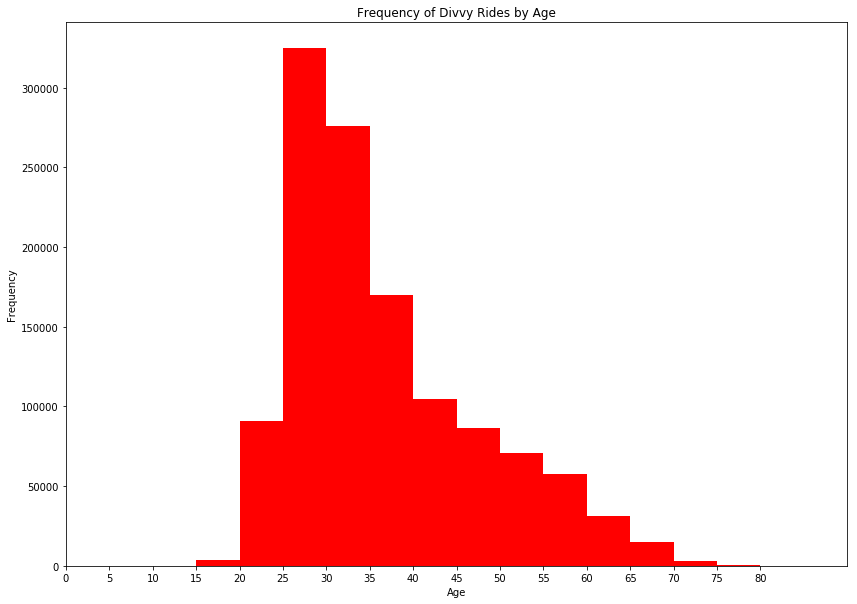

In [456]:
plt.subplots(figsize=(14,10))
l=range(0,85,5)
bins = range(0,90,5)
plt.hist(df['Age'],bins,color='r')
plt.xlim(0,90)
plt.xticks(l)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency of Divvy Rides by Age')
plt.show()

###  Graph 2: TOP 10 MOST USED DIVVY STATIONS

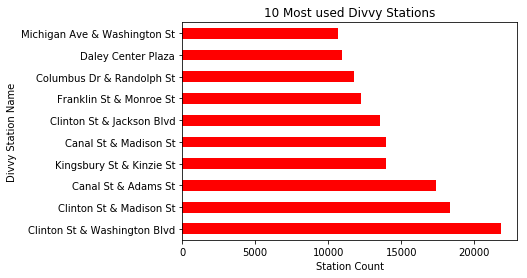

In [452]:
gn = df['from_station_name'].groupby(df['from_station_name']).count()
gn =gn.sort_values(ascending=False)
gn.head(10).plot('barh',color='r')
plt.xlabel('Station Count')
plt.ylabel('Divvy Station Name')
plt.title('10 Most used Divvy Stations')
plt.show()

###  Graph 3:  Gender vs Total No. of Rides

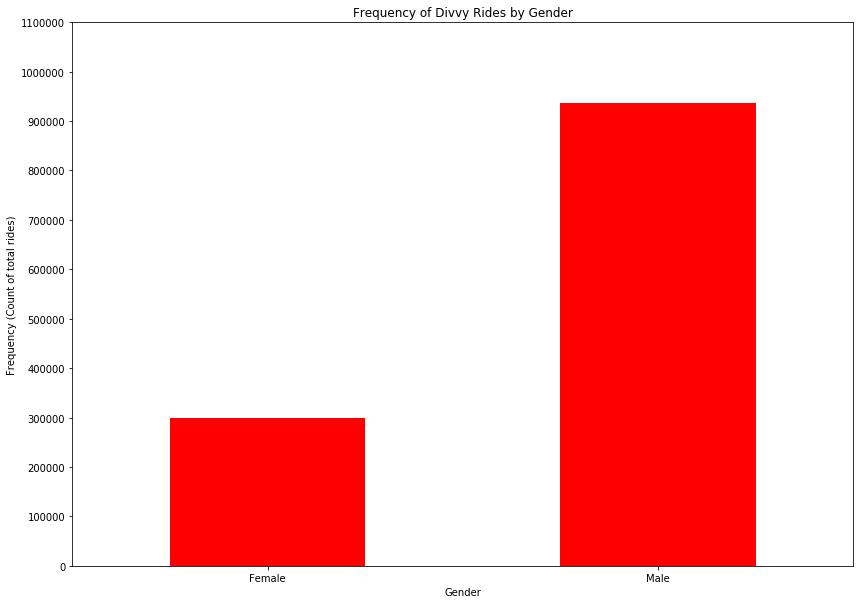

In [451]:
plt.subplots(figsize=(14,10))
l=range(0,1200000,100000)
df['gender'].groupby(df['gender']).count().plot('bar',color='r')
plt.xticks(rotation=360)
plt.yticks(l)
plt.xlabel('Gender')
plt.ylabel('Frequency (Count of total rides)')
plt.title('Frequency of Divvy Rides by Gender')
plt.show()

###  Graph 4: Total number rides by Month 
### Thus, we can see that as we move from January (1) to June (6), no of rides taken increases

In [397]:
import datetime as dt

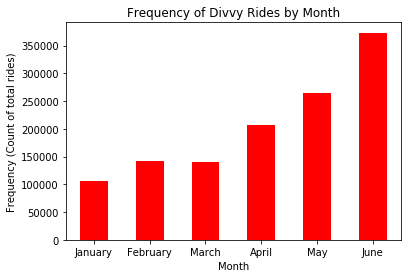

In [450]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['month'] = df['start_time'].dt.month
df['month'].groupby(df['month']).count().plot('bar',color='r')
plt.xticks(rotation=360)

plt.xlabel('Month')
x = np.array([0,1,2,3,4,5])
my_xticks = ['January','February','March','April', 'May','June']

plt.xticks(x, my_xticks)
plt.ylabel('Frequency (Count of total rides)')
plt.title('Frequency of Divvy Rides by Month')
plt.show()


### Graph 5: Total Trip Duration vs Gender 

Here, Y-axis is 10^8 in seconds, thus we can clearly see Male riders spend more time cycling than Female riders.

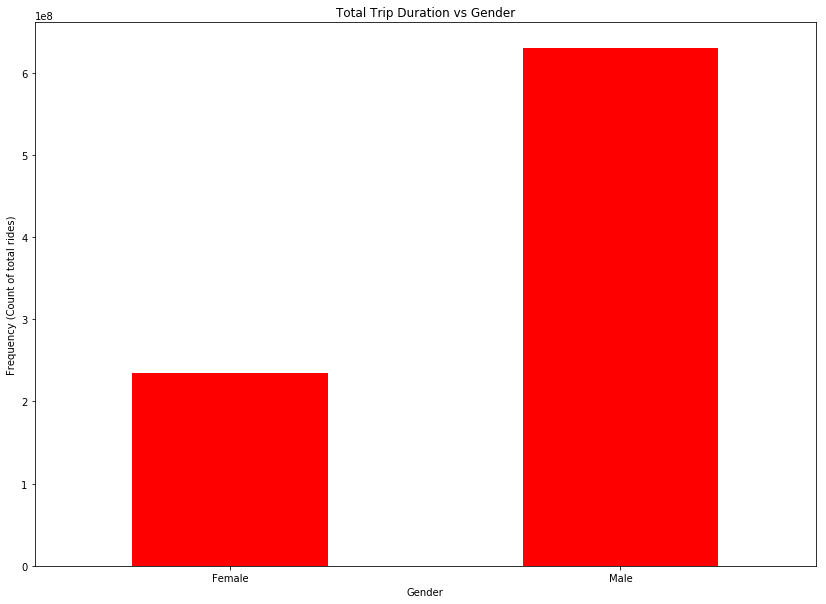

In [449]:
plt.subplots(figsize=(14,10))
df['tripduration'].groupby(df['gender']).sum().plot('bar',color='r')

plt.xticks(rotation=360)
plt.xlabel('Gender')
plt.ylabel('Frequency (Count of total rides)')
plt.title('Total Trip Duration vs Gender')
plt.show()

 ### Graph 6: Days vs Total No of Rides. 

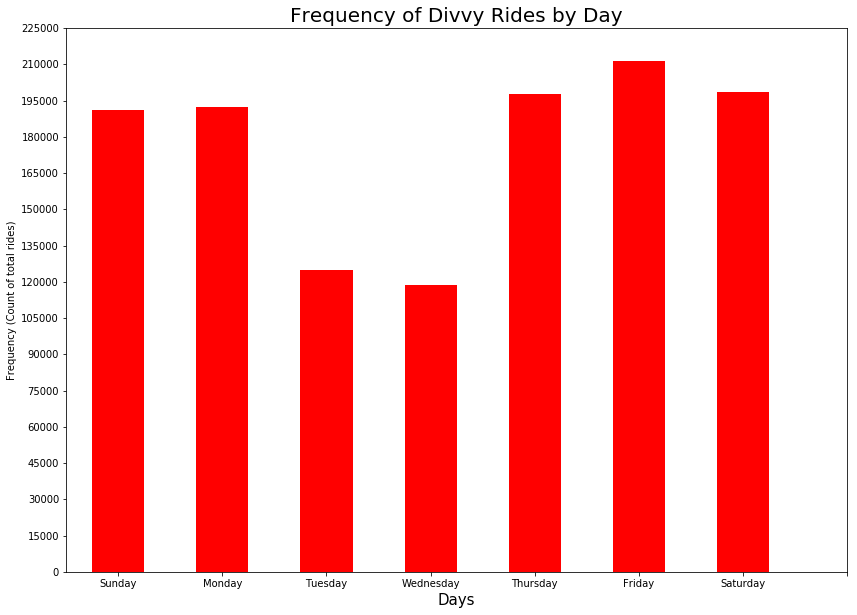

In [448]:
plt.subplots(figsize=(14,10))
df['day']=df['start_time'].dt.weekday_name

l=range(0,240000,15000)
df['day'].groupby(df['day']).count().plot('bar',color='r')
plt.xticks(rotation=360)
plt.yticks(l)


plt.xlabel('Days',size=15)
x = np.array([0,1,2,3,4,5,6,7])
my_xticks = ['Sunday','Monday','Tuesday','Wednesday','Thursday', 'Friday','Saturday']

plt.xticks(x, my_xticks)
plt.ylabel('Frequency (Count of total rides)',)
plt.title('Frequency of Divvy Rides by Day',size=20)
plt.show()



In [501]:
df1 = pd.read_csv(r'C:\Users\Mayur\Downloads\Main_Divvy_File.csv')

In [502]:
df1.head()

,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,trip_id
0,3/31/2017 23:59:07,4/1/2017 00:13:24,5292.0,857.0,66.0,Clinton St & Lake St,171.0,May St & Cullerton St,Subscriber,Male,1989.0,13518905.0
1,3/31/2017 23:56:25,4/1/2017 00:00:21,4408.0,236.0,199.0,Wabash Ave & Grand Ave,26.0,McClurg Ct & Illinois St,Subscriber,Male,1990.0,13518904.0
2,3/31/2017 23:55:33,4/1/2017 00:01:21,696.0,348.0,520.0,Greenview Ave & Jarvis Ave,432.0,Clark St & Lunt Ave,Subscriber,Female,1979.0,13518903.0
3,3/31/2017 23:54:46,3/31/2017 23:59:34,4915.0,288.0,110.0,Dearborn St & Erie St,142.0,McClurg Ct & Erie St,Subscriber,Male,1985.0,13518902.0
4,3/31/2017 23:53:33,4/1/2017 00:00:28,4247.0,415.0,327.0,Sheffield Ave & Webster Ave,331.0,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0,13518901.0


In [503]:
sum(df1.isnull().values.ravel())
df1=df1.dropna()

In [504]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234638 entries, 0 to 1551504
Data columns (total 12 columns):
start_time           1234638 non-null object
end_time             1234638 non-null object
bikeid               1234638 non-null float64
tripduration         1234638 non-null float64
from_station_id      1234638 non-null float64
from_station_name    1234638 non-null object
to_station_id        1234638 non-null float64
to_station_name      1234638 non-null object
usertype             1234638 non-null object
gender               1234638 non-null object
birthyear            1234638 non-null float64
trip_id              1234638 non-null float64
dtypes: float64(6), object(6)
memory usage: 122.5+ MB


In [505]:
df1["Gender"]=0
df1['Gender']=np.where(df1.gender=="Male", 0,np.where(df1.gender=="Female",1, "NAN"))
df1.drop('gender',axis=1,inplace=True)

In [506]:
df1["Usertype"]=0
df1['Usertype']=np.where(df1.usertype=="Subscriber", 2,np.where(df1.usertype=="Customer", 3,
                                                                np.where(df1.usertype=="Dependent",4, "NAN")))
df1.drop('usertype',axis=1,inplace=True)

### FEATURE ENGINEERING.

Splitting the Start time and date into individual variables of month, day and hours which is one of the more important factors in deciding the trip duration

I also got rid of birth year and instead calculated the Age of the individual.

I have also dropped unneccesary columns as shown below. 

In [507]:
x=df1.drop(['from_station_name','to_station_name','trip_id','tripduration','start_time','end_time'],axis=1)
y=df1['tripduration']

In [508]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=1)

In [509]:
from dateutil.parser import parse

In [510]:
df1['Day'] = [parse(i).day for i in df1.start_time]
df1['Month'] = [parse(i).month for i in df1.start_time]
df1['Hour'] = [parse(i).hour for i in df1.start_time]

In [511]:
df1.head()

,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,birthyear,trip_id,Gender,Usertype,Day,Month,Hour
0,3/31/2017 23:59:07,4/1/2017 00:13:24,5292.0,857.0,66.0,Clinton St & Lake St,171.0,May St & Cullerton St,1989.0,13518905.0,0,2,31,3,23
1,3/31/2017 23:56:25,4/1/2017 00:00:21,4408.0,236.0,199.0,Wabash Ave & Grand Ave,26.0,McClurg Ct & Illinois St,1990.0,13518904.0,0,2,31,3,23
2,3/31/2017 23:55:33,4/1/2017 00:01:21,696.0,348.0,520.0,Greenview Ave & Jarvis Ave,432.0,Clark St & Lunt Ave,1979.0,13518903.0,1,2,31,3,23
3,3/31/2017 23:54:46,3/31/2017 23:59:34,4915.0,288.0,110.0,Dearborn St & Erie St,142.0,McClurg Ct & Erie St,1985.0,13518902.0,0,2,31,3,23
4,3/31/2017 23:53:33,4/1/2017 00:00:28,4247.0,415.0,327.0,Sheffield Ave & Webster Ave,331.0,Halsted St & Blackhawk St (*),1989.0,13518901.0,1,2,31,3,23


In [514]:
year=2017
df1.insert(11,'year', 2017)

df1['Age'] = df1['year'] - df1['birthyear']


,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,birthyear,trip_id,Gender,year,Usertype,Day,Month,Hour,Age
0,3/31/2017 23:59:07,4/1/2017 00:13:24,5292.0,857.0,66.0,Clinton St & Lake St,171.0,May St & Cullerton St,1989.0,13518905.0,0,2017,2,31,3,23,28.0
1,3/31/2017 23:56:25,4/1/2017 00:00:21,4408.0,236.0,199.0,Wabash Ave & Grand Ave,26.0,McClurg Ct & Illinois St,1990.0,13518904.0,0,2017,2,31,3,23,27.0
2,3/31/2017 23:55:33,4/1/2017 00:01:21,696.0,348.0,520.0,Greenview Ave & Jarvis Ave,432.0,Clark St & Lunt Ave,1979.0,13518903.0,1,2017,2,31,3,23,38.0
3,3/31/2017 23:54:46,3/31/2017 23:59:34,4915.0,288.0,110.0,Dearborn St & Erie St,142.0,McClurg Ct & Erie St,1985.0,13518902.0,0,2017,2,31,3,23,32.0
4,3/31/2017 23:53:33,4/1/2017 00:00:28,4247.0,415.0,327.0,Sheffield Ave & Webster Ave,331.0,Halsted St & Blackhawk St (*),1989.0,13518901.0,1,2017,2,31,3,23,28.0


In [515]:
x=df1.drop(['bikeid','from_station_name','to_station_name','trip_id','tripduration','start_time','end_time','start_time','birthyear','year'],axis=1)
y=df1['tripduration']

### Here, I am selecting the IMPORTANT FEATURES via XGB Regressor and then using those features to further solve the questions

In [518]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=1)

Feautre Importances via XGB Regressor: 
                   importance
feature                    
from_station_id        21.3
to_station_id          21.0
Day                    18.2
Age                    17.4
Hour                   14.5
Month                   7.3
Gender                  0.2
Usertype                0.0 %


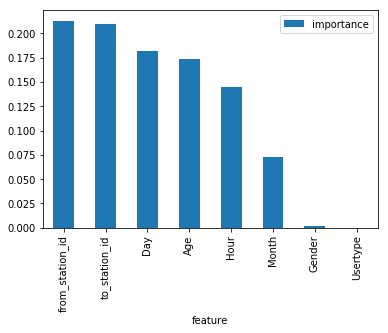

In [519]:
from sklearn.ensemble import RandomForestRegressor

rfc_model = RandomForestRegressor()
rfc_model.fit(X_train, y_train)
importances = pd.DataFrame({'feature':x.columns,'importance':np.round(rfc_model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
 
print("Feautre Importances via XGB Regressor: \n ", importances*100,"%")
importances.plot.bar()

In [520]:
x.head()

,from_station_id,to_station_id,Gender,Usertype,Day,Month,Hour,Age
0,66.0,171.0,0,2,31,3,23,28.0
1,199.0,26.0,0,2,31,3,23,27.0
2,520.0,432.0,1,2,31,3,23,38.0
3,110.0,142.0,0,2,31,3,23,32.0
4,327.0,331.0,1,2,31,3,23,28.0


In [521]:
x1=x.drop(['Usertype'],axis=1)

In [522]:
x1.to_csv("Final Dataset - With Feature Engineering.csv")

In [433]:
X_train, X_test, y_train, y_test = train_test_split(x1,y,random_state=1)

In [303]:
# Create the model and fit the data
from sklearn.ensemble import RandomForestRegressor as RFR

n_estimators = [10,20,50,80,100,200]
oob_errors = []

for n in n_estimators:
    rfr = RFR(n_estimators=n, criterion="mse", max_depth=None, min_samples_split=2, min_samples_leaf=1,
                      min_weight_fraction_leaf=0.0, max_features="auto", max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None,
                      bootstrap=True, oob_score=True, n_jobs=6, random_state=1, verbose=1, warm_start=False)

    rfr.fit(X_train,y_train)
    y_pred = rfr.predict(X_test)
    oob_errors.append(rfr.oob_score_)
    

[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:   18.1s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:   18.1s finished
C:\Users\Mayur\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    0.6s finished
[Parallel(n_jobs=6)]: Done  20 out of  20 | elapsed:   35.7s finished
C:\Users\Mayur\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
[Parallel(n_jobs=6)]: Done  20 out of  20 | elapsed:    1.3s finished
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  

In [354]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(oob_errors)
print(mean_absolute_error(y_test,y_pred))

[-0.40386411641937747, -0.15934357115984055, -0.039612353782456422, -0.012987819688766722, -0.0038300172277851985, 0.013359989665981398]
328.113694904


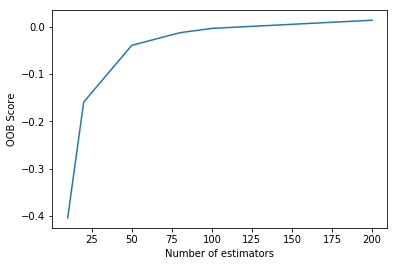

In [305]:
# plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(n_estimators,oob_errors)
plt.xlabel("Number of estimators")
plt.ylabel("OOB Score")
plt.show()

In [434]:
x=df1.drop(['from_station_name','to_station_name','trip_id','tripduration','start_time','end_time'],axis=1)
y=df1['tripduration']
x1=x.drop(['Usertype'],axis=1)

### For Grid Search here, I reduced the size of the dataset to       as it was taking a lot of time to execute. 


In [435]:
x1 = x1.drop(x1.index[range(100000,1234638)])
y = y.drop(y.index[range(100000,1234638)])

In [436]:
X_train, X_test, y_train, y_test = train_test_split(x1,y,test_size=0.3,random_state=1)

In [437]:
rm = RandomForestRegressor()
rm.fit(X_train,y_train)
from sklearn.model_selection import GridSearchCV
random_1 = GridSearchCV(rm,{'n_estimators':[45,50,55],
                             'max_depth':[7,8,10],
                              'min_samples_split':[2,3,4,5]},verbose=1)
random_1.fit(X_train,y_train)
print(random_1.best_score_)
print(random_1.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:  7.5min finished


-0.0345895561144
{'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 50}


In [438]:
from sklearn.ensemble import RandomForestRegressor as rfr

r_model = rfr(criterion="mse", max_depth=7,
                                        min_samples_split=5,
                                        n_estimators=55,
                                        bootstrap=True,
                                        oob_score=True)

r_model.fit(X_train,y_train)
y_pred=r_model.predict(X_test)

In [439]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))

Mean Absolute Error: 318.359392846
Mean Squared Error: 1417995.0434
